<h3>Task:</h3>
Identify patients with a stroke

<h4>Expected Submission</h4>

Solve the task primarily using Notebooks.
The solution should contain two columns:
<ol>
<li>id</li>
<li>Stroke</li>
</ol>

<h4>Evaluation</h4>

Evaluation using F1-Score (given the output class imbalance)

In [38]:
import numpy as np, pandas as pd, matplotlib as mpl,os, re

In [39]:
from matplotlib import pyplot as plt

In [40]:
%matplotlib inline

In [41]:
class FilesReader:
    def __init__(self,path):
        if os.path.exists(path):
            self.__path=path
            self.__dict={}
        else:
            raise Exception('Path does not exist')
        
    def read(self):
        list_of_files=os.listdir(self.__path)
        for file in list_of_files:
            self.__create_dict(file)
        return self.__dict
        
    def __create_dict(self,file):
        if re.findall('\.csv',file):
            file_read=pd.read_csv(os.path.join(self.__path,file))
            key=re.findall('(\w+)\.',file)[0]
            self.__dict[key]=file_read
        elif re.findall('.xlsx',file):
            file_read=pd.read_excel(os.path.join(self.__path,file))
            key=re.findall('(\w+)\.',file)[0]
            self.__dict[key]=file_read
        else:
            raise Exception('Not supported format')

In [42]:
file_reader=FilesReader(r'/Users/aleksandrmalinin/Documents/MLprojects/ML tasks/Predict Stroke')

In [43]:
dataset=file_reader.read()['data']

<h4>Data Description</h4>

<ol>
<li>id: unique identifier</li>
<li>gender: "Male", "Female" or "Other"</li>
<li>age: age of the patient</li>
<li>hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension</li>
<li>heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
<li>ever_married: "No" or "Yes"</li>
<li>work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"</li>
<li>Residence_type: "Rural" or "Urban"</li>
<li>avg_glucose_level: average glucose level in blood</li>
<li>bmi: body mass index</li>
<li>smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*</li>
<li>stroke: 1 if the patient had a stroke or 0 if not</li>
</ol>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patien

In [44]:
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [45]:
#Not all instances contain bmi index. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [46]:
#All of the object(string in this case) features are categorial 

In [47]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [48]:
dataset['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [49]:
dataset['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [50]:
dataset['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [51]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [52]:
#There is at least one feature, which contain illogical values - age: 0,08. 
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


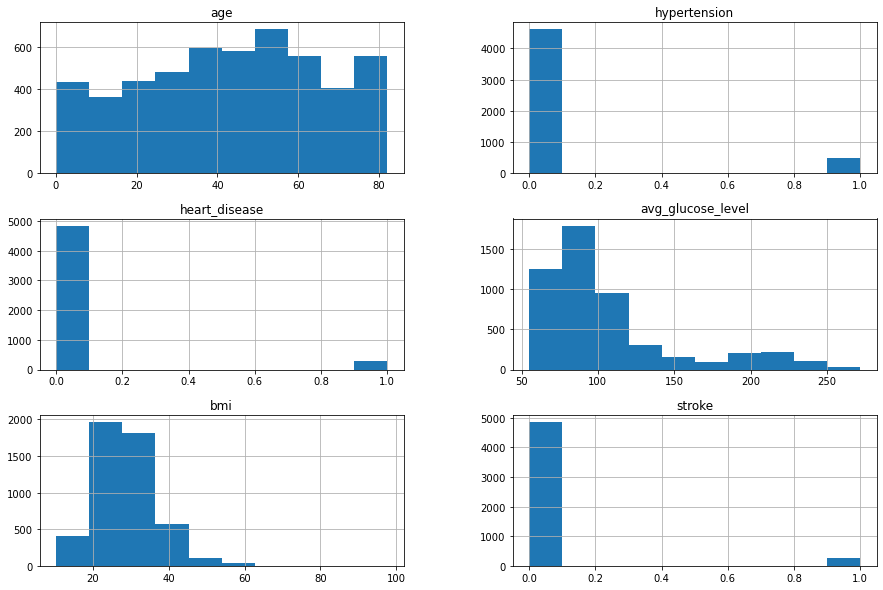

In [53]:
dataset.loc[:,dataset.columns!='id'].hist(figsize=(15,10))
plt.show()

In [54]:
#on the histograms above the following things might be observed:
#-first of all the target label - stroke -> there are very few observation contining stroke - "1" value
#-heart_disease,hyper_tension - the majority of the observation consider to contain "0" ('no') - value
#-avg_glucose_level - is generally tail_heavy with low values
#-bmi-the majority of values lay between 20 and 30+, which means that patients either have normal weight or overweight, but not underweight or obesed
#Considering everything mentioned above it might be concluded that generally the sampling consists of healthy people.
#Not considering yet the lifestyle of life conditions yet

In [55]:
#Since there is a minor intances with stroke, it should be ensured that the test set will have the same proportion of instances with stroke equals to 1

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

In [57]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_index,test_index in split.split(dataset,dataset['stroke']):
    strat_train_set=dataset.loc[train_index]
    strat_test_set=dataset.loc[test_index]

In [58]:
patients_train_dataset=strat_train_set.copy()

In [59]:
patients_train_dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
837,33410,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
2899,33976,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
708,49744,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3144,3442,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4920,45404,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0
2834,49084,Male,20.0,0,0,No,Private,Urban,57.51,21.4,Unknown,0
4309,72491,Male,53.0,0,0,Yes,Private,Urban,74.66,29.2,smokes,0
3649,18866,Female,75.0,0,0,Yes,Self-employed,Urban,96.95,41.4,never smoked,0
909,5475,Female,39.0,0,0,Yes,Private,Rural,69.58,28.1,Unknown,0
1485,46284,Male,53.0,1,0,Yes,Self-employed,Urban,227.51,34.7,formerly smoked,0


In [60]:
patients_train_dataset.corr()
#Age out of all factors correlates mostly with stroke
#Other features except bmi have almost equal correlation, which is approximately twice lower than age

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.006167,0.005544,0.000918,0.007185,0.017157,0.011475
age,0.006167,1.000000,0.269858,0.267305,0.229352,0.333350,0.244167
hypertension,0.005544,0.269858,1.000000,0.103852,0.172154,0.164642,0.119044
heart_disease,0.000918,0.267305,0.103852,1.000000,0.163349,0.040965,0.135122
avg_glucose_level,0.007185,0.229352,0.172154,0.163349,1.000000,0.174542,0.130756
bmi,0.017157,0.333350,0.164642,0.040965,0.174542,1.000000,0.036798
stroke,0.011475,0.244167,0.119044,0.135122,0.130756,0.036798,1.000000


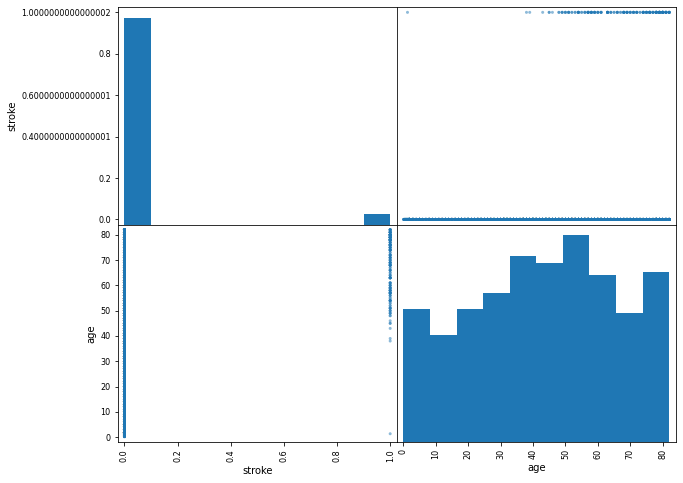

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(patients_train_dataset[['stroke','age']],figsize=(10,8))
plt.show()
#it is noticable, that almost all of the observations, which possess stroke =1, include patients with the age close
#to or over 40, except of a one, which look liker the mistake in data

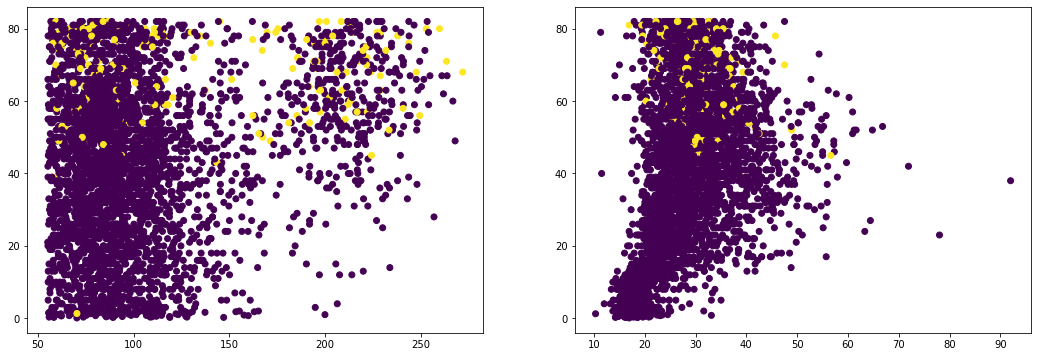

In [62]:
#As it is noticable on the scatter-plots (and as we mentioned) above
#stroke has low to very low correlation with other features but age
fig,ax=plt.subplots(nrows=1,ncols=2)
ax1,ax2=ax
ax1.scatter(patients_train_dataset['avg_glucose_level'],patients_train_dataset['age'],
          c=patients_train_dataset['stroke'])

ax2.scatter(patients_train_dataset['bmi'],patients_train_dataset['age'],
          c=patients_train_dataset['stroke'])


fig.set_size_inches(18,6)
plt.show()

In [63]:
#There were also data with bmi feature equals to NaN, it will be taken care of further
patients_train_dataset.loc[patients_train_dataset['bmi'].isna(),:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
105,2346,Male,58.0,0,0,Yes,Private,Urban,82.30,NaN,smokes,1
2828,42545,Male,29.0,1,0,Yes,Private,Urban,77.55,NaN,formerly smoked,0
1640,17752,Male,76.0,0,1,Yes,Private,Urban,79.05,NaN,Unknown,0
81,26015,Female,66.0,0,0,Yes,Self-employed,Urban,101.45,NaN,Unknown,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
671,967,Male,61.0,0,1,Yes,Private,Urban,88.27,NaN,never smoked,0
1293,68003,Male,46.0,1,0,Yes,Private,Rural,73.72,NaN,smokes,0
1644,4538,Female,29.0,0,0,No,Private,Urban,81.43,NaN,formerly smoked,0
4286,23339,Male,3.0,0,0,No,children,Rural,194.75,NaN,Unknown,0


<h5>Preparing the data</h5>

In [64]:
class NaNDeal:
    def __init__(self,strategy,test_dataset=False):
        if strategy in ['drop_na_feature','drop_na_values','use_median','use_zero']:
            self.strategy=strategy
            self.train_list_of_medians=None
        else:
            raise Exception ('The selected strategy is not avalable, use one of the following: drop_na_feature,drop_na_values,use_median,use_zero')
    
    def fit_transform(self,column_list,X=False,test_dataset=False):
        if not np.any(X) and not np.any(test_dataset):
            raise Exception('Use train or test datasets')
        elif np.any(X) and not np.any(test_dataset):
            self.__initial_dataset=X.copy()
        else:
            self.__initial_dataset=test_dataset.copy()
        
        
        if type(column_list) is not list:
            column_list=[column_list]

        if self.strategy=='drop_na_feature':
            self.result_dataset=self.__initial_dataset.drop(column_list,axis=1)
            return self.result_dataset
        
        elif self.strategy=='drop_na_values':
            self.result_dataset=self.__initial_dataset.dropna(subset=column_list)
            return self.result_dataset
        
        elif self.strategy=='use_median':
            if not test_dataset:
                list_of_medians=[]

                for column in column_list:
                    median=self.__initial_dataset[column].median()
                    list_of_medians.append(median)
                for element in enumerate(column_list):
                    key=element[1]
                    self.__initial_dataset[key].fillna(list_of_medians[element[0]],inplace=True)

                self.train_list_of_medians=list_of_medians
                self.result_dataset=self.__initial_dataset
                return self.result_dataset
            
            else:
                for element in enumerate(column_list):
                    key=element[1]
                    self.__initial_dataset[key].fillna(self.train_list_of_medians[element[0]],inplace=True)
                    
                    self.result_dataset=self.__initial_dataset
                    return self.result_dataset
                
            
        else:
            for column in column_list:
                self.__initial_dataset[column].fillna(0,inplace=True)
            
            self.result_dataset=self.__initial_dataset
            return self.result_dataset

In [65]:
# na_deal=NaNDeal(strategy='drop_na_feature')
na_to_median=NaNDeal(strategy='use_median')

In [66]:
patients_train_dataset_updated=na_to_median.fit_transform(column_list='bmi',X=patients_train_dataset)

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
# class Encoder(OrdinalEncoder):
#     def __init__(self,strategy_):
#         if strategy_ in ['ordinal','one-hot']:
#             if strategy_ =='ordinal': 
#                 super().__init__()
#             elif strategy_=='one-hot':
#                 pass
#             self.strategy_=strategy_
#         else:
#             raise Exception ('There is no such strategy_, please use: ordinal or one-hot')
                
    
#     def __find_categories(self,dataset):
#         category_features=[]
#         for key,value in dataset.dtypes.items():
#             if value=='object':
#                 category_features.append(key)
#         return category_features
                
      
#     def __delete_columns(self,dataset,columns):
#         return dataset.drop(columns,axis=1)
    
    
#     def __merge_datasets(self,intermediate_dataset,encoded_dataset):
#         intermediate_dataset.reset_index(drop=True,inplace=True)
#         encoded_dataset.reset_index(drop=True,inplace=True)
#         return pd.concat([intermediate_dataset,encoded_dataset],axis=1)
        
    
#     def fit_transform(self,X):
#         self.__initial_dataset=X.copy()
#         self.__categories=self.__find_categories(self.__initial_dataset)
        
#         if self.strategy_=='ordinal': 
#             self.__ordinary_encoded_dataset=super().fit_transform(X[self.__categories])
#             self.__ordinary_encoded_dataframe=pd.DataFrame(self.__ordinary_encoded_dataset,columns=self.__categories)
            
#         else:
#             pass
        
#         self.__intermediate_dataset=self.__delete_columns(self.__initial_dataset,self.__categories)
#         self.encoded_dataframe=self.__merge_datasets(self.__intermediate_dataset,self.__ordinary_encoded_dataframe)
        
#         return self.encoded_dataframe

In [68]:
class Encoder(OrdinalEncoder):
    def __init__(self,strategy_):
        if strategy_ in ['ordinal','one-hot']:
            if strategy_ =='ordinal': 
                super().__init__()
            self.strategy_=strategy_
        else:
            raise Exception ('There is no such strategy_, please use: ordinal or one-hot')
                
    
    def __find_categories(self,dataset):
        category_features=[]
        for key,value in dataset.dtypes.items():
            if value=='object':
                category_features.append(key)
        return category_features
                
      
    def __delete_columns(self,dataset,columns):
        return dataset.drop(columns,axis=1)
    
    
    def __merge_datasets(self,intermediate_dataset,encoded_dataset):
        intermediate_dataset.reset_index(drop=True,inplace=True)
        encoded_dataset.reset_index(drop=True,inplace=True)
        return pd.concat([intermediate_dataset,encoded_dataset],axis=1)
        
    
    def fit_transform(self,X):
        self.__initial_dataset=X.copy()
        self.__categories=self.__find_categories(self.__initial_dataset)
        
        if self.strategy_=='ordinal': 
            self.__ordinary_encoded_dataset=super().fit_transform(X[self.__categories])
            self.__encoded_dataframe=pd.DataFrame(self.__ordinary_encoded_dataset,columns=self.__categories)
            
        else:
            self.__encoded_dataframe=pd.get_dummies(self.__initial_dataset[self.__categories])
        
        self.__intermediate_dataset=self.__delete_columns(self.__initial_dataset,self.__categories)
        self.encoded_dataframe=self.__merge_datasets(self.__intermediate_dataset,self.__encoded_dataframe)
        
        
        
        return self.encoded_dataframe

In [69]:
encoder=Encoder(strategy_='one-hot')

In [70]:
patients_train_dataset_encoded=encoder.fit_transform(patients_train_dataset_updated)

In [71]:
class ColumnDropperSeparator:
    def __init__(self,strategy_):
        if strategy_ in ['drop','separate','drop-separate']:
            self.strategy_=strategy_
        else:
            raise Exception ('There is no such strategy, choose from: drop for dropping cloumns, separate for creating the dataset with separated columns, drop-separte for both')
    
    
    def drop_separate(self,X,columns_to_drop=False,columns_to_separate=False):
        self.__initial_dataset=X.copy()
        if self.strategy_=='drop':
            self.dataset=self.__initial_dataset.drop(columns_to_drop,axis=1)
            return self.dataset
        elif self.strategy_=='separate':
            self.dataset=self.__initial_dataset.drop(columns_to_separate,axis=1)
            self.new_dataset=self.__initial_dataset[columns_to_separate]
            return self.dataset,self.new_dataset
        else:
            list(map((lambda element:columns_to_drop.remove(element) if element in columns_to_drop else element),columns_to_separate))
            self.__columns_to_drop=columns_to_drop+columns_to_separate
            self.dataset=self.__initial_dataset.drop(self.__columns_to_drop,axis=1)
            self.new_dataset=self.__initial_dataset[columns_to_separate]
            return self.dataset,self.new_dataset

In [72]:
class Scaler:
    def __init__(self,strategy_):
        if strategy_ in ['norm','stand']:
            self.strategy_=strategy_
        else:
            raise Exception('There is no such strategy, please use - norm - for normalization, - stand - for standartization')
            
    def fit_transform(self,columns,train_dataset=False,test_dataset=False):
        if not np.any(train_dataset) and not np.any(test_dataset):
            raise Exception ('Indicate - train_dataset -  for train or - test_dataset - for test')
        elif np.any(train_dataset) and np.any(test_dataset):
            raise Exception ('Only one dataset should be indicated. Indicate - train_dataset -  for train or - test_dataset - for test')
        elif np.any(train_dataset) and not np.any(test_dataset):
            self.__train_dataset=train_dataset.copy()
            if self.strategy_=='norm':
                self.__scaled_dataframe=self.__normalization(self.__train_dataset,columns)
            else:
                self.__scaled_dataframe=self.__standartization(self.__train_dataset,columns)
        else:
            pass
        
    
        self.__intermediate_dataset=self.__delete_columns(self.__train_dataset,columns)
        self.scaled_dataframe=self.__merge_datasets(self.__intermediate_dataset,self.__scaled_dataframe)

        return self.scaled_dataframe
        
        
        
    def __normalization(self,dataset,columns):
        self.normalization_min_values=dataset[columns].min(axis=0)
        self.normalization_max_values=dataset[columns].max(axis=0)
        self.__normolized_dataset=(dataset[columns]-self.normalization_min_values)/(self.normalization_max_values-self.normalization_min_values)
        return self.__normolized_dataset
    
    def __standartization(self,dataset,columns):
        self.standartization_mean=dataset[columns].mean(axis=0)
        self.standartization_std=dataset[columns].std(axis=0)
        self.__standardized_dataset=(dataset[columns]-self.standartization_mean)/self.standartization_std
        return self.__standardized_dataset
        
    
    def __delete_columns(self,dataset,columns):
        return dataset.drop(columns,axis=1)
    
    
    def __merge_datasets(self,intermediate_dataset,scaled_dataset):
        intermediate_dataset.reset_index(drop=True,inplace=True)
        scaled_dataset.reset_index(drop=True,inplace=True)
        return pd.concat([intermediate_dataset,scaled_dataset],axis=1)

In [73]:
scaler_stand=Scaler(strategy_='stand')

In [75]:
patients_train_dataset_encoded_stand=scaler_stand.fit_transform(columns=['age','bmi','avg_glucose_level'],train_dataset=patients_train_dataset_encoded)

In [130]:
drop_separate=ColumnDropperSeparator(strategy_='drop')

In [131]:
patients_train_dataset_encoded_stand_updated=drop_separate.drop_separate(patients_train_dataset_encoded_stand,columns_to_drop=['gender_Other'])

In [133]:
another_split=StratifiedShuffleSplit(n_splits=3,test_size=0.2,random_state=42)
for train_index,validation_index in another_split.split(patients_train_dataset_encoded_stand_updated,patients_train_dataset_encoded_stand_updated['stroke']):
    train_strat=patients_train_dataset_encoded_stand_updated.loc[train_index]
    validation_strat=patients_train_dataset_encoded_stand_updated.loc[validation_index]

In [152]:
droper=ColumnDropperSeparator(strategy_='separate')

In [153]:
train_set,train_labels=droper.drop_separate(train_strat,columns_to_separate=['stroke'])

In [155]:
validation_set,validation_labels=droper.drop_separate(validation_strat,columns_to_separate=['stroke'])

<h5>Selecting and training the model</h5>

In [158]:
from sklearn.model_selection import cross_val_predict

In [186]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [160]:
#1st model SGD Classifier

In [161]:
from sklearn.linear_model import SGDClassifier

In [162]:
sgd_classifier=SGDClassifier(random_state=42)

In [163]:
sgd_classifier.fit(train_set,train_labels.values.flatten())

SGDClassifier(random_state=42)

In [164]:
validation_labels_predicted=sgd_classifier.predict(validation_set)

In [166]:
f1_score(validation_labels,validation_labels_predicted,average='weighted')

0.9282363074693499

In [167]:
#2nd model RandomForest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
rf_classifier=RandomForestClassifier()

In [175]:
rf_classifier.fit(train_set,train_labels.values.flatten())

RandomForestClassifier()

In [176]:
validation_labels_predicted_rf=rf_classifier.predict(validation_set)

In [185]:
f1_score(validation_labels,validation_labels_predicted_rf,average='weighted')

0.9282363074693499

In [ ]:
#Since the initial dataset is skewed in terms of 0 values, the script above will be rearranged in order to work with skewed data